In [1]:
import numpy as np # for data frame
import pandas as pd # for mathemetical operation
import matplotlib.pyplot as plt # for vizualization
%matplotlib inline
import seaborn as sns
from sklearn.linear_model import LinearRegression #  For regression in Machine Learning
from sklearn.metrics import r2_score,mean_squared_error # For Accuracy

In [2]:
import os
os.chdir("E:\Machine Learning\ML_Projects\Project_1_Linear_Regression")

In [3]:
%pwd

'E:\\Machine Learning\\ML_Projects\\Project_1_Linear_Regression'

In [96]:
df = pd.read_csv("E:\Machine Learning\ML_Projects\Project_1_Linear_Regression\project1_dataset.csv")
df

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,NaN,8.0,9,50000
1,NaN,8.0,6,45000
2,5.0,6.0,7,60000
3,2.0,10.0,10,65000
4,7.0,9.0,6,70000
5,3.0,7.0,10,62000
6,10.0,NaN,7,72000
7,11.0,7.0,8,80000


In [97]:
df["experience"] = df["experience"].fillna(0)
df

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,0.0,8.0,9,50000
1,0.0,8.0,6,45000
2,5.0,6.0,7,60000
3,2.0,10.0,10,65000
4,7.0,9.0,6,70000
5,3.0,7.0,10,62000
6,10.0,NaN,7,72000
7,11.0,7.0,8,80000


In [98]:
import math
mean_value_test_score = math.floor(df["test_score(out of 10)"].mean())
mean_value_test_score

7

In [99]:
df["test_score(out of 10)"] = df["test_score(out of 10)"].fillna(mean_value_test_score)
df

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,0.0,8.0,9,50000
1,0.0,8.0,6,45000
2,5.0,6.0,7,60000
3,2.0,10.0,10,65000
4,7.0,9.0,6,70000
5,3.0,7.0,10,62000
6,10.0,7.0,7,72000
7,11.0,7.0,8,80000


In [100]:
df.columns

Index(['experience', 'test_score(out of 10)', 'interview_score(out of 10)',
       'salary($)'],
      dtype='object')

#### Display a scatter plot between experience and Salary

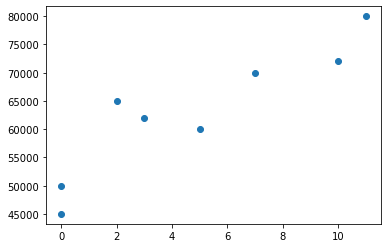

In [49]:
plt.scatter(df["experience"],df["salary($)"])

#### Display a scatter plot between test score and Salary

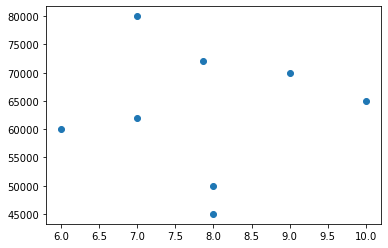

In [50]:
plt.scatter(df["test_score(out of 10)"],df["salary($)"])

#### Display a scatter plot between interview score and Salary

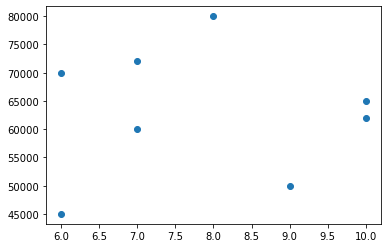

In [51]:
plt.scatter(df["interview_score(out of 10)"],df["salary($)"])

<BarContainer object of 8 artists>

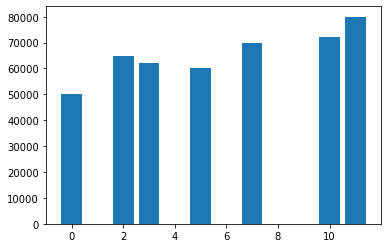

In [52]:
plt.bar(df["experience"],df["salary($)"])

In [101]:
X=df[['experience', 'test_score(out of 10)','interview_score(out of 10)']]
X
X.shape

(8, 3)

In [54]:
X.head()

,experience,test_score(out of 10),interview_score(out of 10)
0,0.0,8.0,9
1,0.0,8.0,6
2,5.0,6.0,7
3,2.0,10.0,10
4,7.0,9.0,6


In [55]:
Y=df[['salary($)']]
Y
Y.shape

(8, 1)

In [56]:
Y.head()

,salary($)
0,50000
1,45000
2,60000
3,65000
4,70000


In [63]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.7,random_state=10)

## Model Intilization

In [64]:
from sklearn.linear_model import LinearRegression

In [65]:
regression_model=LinearRegression()

In [66]:
regression_model.fit(X_train,Y_train)

LinearRegression()

In [86]:
Predicted_Salary=regression_model.predict(X_test)
Predicted_Salary

array([[52846.15384615],
       [45000.        ],
       [58730.76923077],
       [58076.92307692],
       [58076.92307692],
       [62000.        ],
       [67324.17582418],
       [72461.53846154]])

In [89]:
regression_model.score(X_test,Y_test)

0.4850686657354568

### Model Evaluation

In [69]:
from sklearn.metrics import mean_squared_error,r2_score

In [73]:
mse=mean_squared_error(Y_test,Predicted_Salary)
r2 = r2_score(Y_test,Predicted_Salary) 

In [74]:
print('Slope:' ,regression_model.coef_) 
print('Intercept:', regression_model.intercept_) 
print('Root mean squared error: ', mse) 
print('R2 score: ', r2) 

Slope: [[1961.53846154 -653.84615385 2615.38461538]]
Intercept: [34538.46153846]
Root mean squared error:  46415338.324678965
R2 score:  0.4850686657354568


In [76]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

In [82]:
ridge_reg= Ridge(alpha=500, max_iter=100,)
ridge_reg.fit(X_train, Y_train)

Ridge(alpha=500, max_iter=100)

In [83]:
ridge_reg.score(X_train,Y_train)

0.05004008830827367